In [2]:
import torch #main torch module
import torch.nn as nn #neural net module
import torch.optim as optim #optimizers
import torch.nn.functional as F #functions like ReLu Sig Tanh etc
from torch.utils.data import DataLoader #help us with datasets
import torchvision
import torchvision.datasets as datasets #using to access std data
import torchvision.transforms as transforms #transformations

In [3]:
def epoch_accuracy(loader,model):
    #either train or test accuracy
    num_correct = 0
    num_samples = 0
    model.eval() #set to evaluation mode
    with torch.no_grad():
        #only have to check accuracy, dont compute grads
        for x,y in loader:
            x = x.to(device)
            y = y.to(device)
            #x = x.reshape(x.shape[0],-1)
            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
    accuracy = float(num_correct)/float(num_samples)
    model.train()
    return accuracy 

def save_checkpoint(state, filename="./checkpoints/my_checkpoint.pth.tar"):
    print("Saving Checkpoint ==>")
    torch.save(state, filename)
    
def load_checkpoint(checkpoint):
    print("Loading Checkpoint ==>")
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])

### Network Definitions

Below we will import a VGG16 Model

In [4]:
model = torchvision.models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\ishaa/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100.0%


In [7]:
# Hyperparameters
input_size = 784
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 20
load_model = False

### Model Training & Eval.

In [5]:
# Set Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
# Loading Test Data
test_dataset = datasets.MNIST(root='dataset/', train=False,  transform = transforms.ToTensor(), download = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = True)

# Loading Data
train_dataset = datasets.MNIST(root='dataset/',train=True, transform = transforms.ToTensor(), download = True)
train_loader = DataLoader(dataset = train_dataset,batch_size = batch_size,shuffle = True)

In [10]:
#init the network
model = CNN(in_channels = 1,num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),
                      lr = learning_rate)

In [ ]:
if load_model:
    load_checkpoint(torch.load("./checkpoints/my_checkpoint.pth.tar"))

In [12]:
%%time
# training loop
train_accs = []
test_accs = []
for epoch in range(num_epochs):
    
    if epoch % 3 == 0:
        checkpoint = {'state_dict': model.state_dict(),
                  'optimizer' : optimizer.state_dict()}
        save_checkpoint(checkpoint)
        
        
    print(f"epoch {epoch+1}/{num_epochs} : ",end='\t')
    
    for batch_idx,(data, targets) in enumerate(train_loader):
        # data to devices
        data = data.to(device)
        targets = targets.to(device)
        #data = data.reshape(data.shape[0],-1)#flattens
        # this is flatten because cnn accepts
        #fwd
        scores = model(data)
        loss = criterion(scores, targets)
        
        #back
        optimizer.zero_grad() #so that it does not store prev backprop calc
        loss.backward()
    
        #gradient desc
        optimizer.step()
    
    train_acc = epoch_accuracy(train_loader, model)
    test_acc = epoch_accuracy(test_loader, model)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
    print(f"Training Accuracy:{train_acc: .3f}",end='\t')
    print(f"Validation Accuracy:{test_acc: .3f}")

epoch 1/20 : 	Saving Checkpoint ==>
Training Accuracy: 0.965	Validation Accuracy: 0.967
epoch 2/20 : 	Training Accuracy: 0.979	Validation Accuracy: 0.977
epoch 3/20 : 	Training Accuracy: 0.980	Validation Accuracy: 0.978
epoch 4/20 : 	Saving Checkpoint ==>
Training Accuracy: 0.984	Validation Accuracy: 0.983
epoch 5/20 : 	Training Accuracy: 0.988	Validation Accuracy: 0.985
epoch 6/20 : 	Training Accuracy: 0.982	Validation Accuracy: 0.981
epoch 7/20 : 	Saving Checkpoint ==>
Training Accuracy: 0.989	Validation Accuracy: 0.984
epoch 8/20 : 	Training Accuracy: 0.989	Validation Accuracy: 0.984
epoch 9/20 : 	Training Accuracy: 0.990	Validation Accuracy: 0.986
epoch 10/20 : 	Saving Checkpoint ==>
Training Accuracy: 0.991	Validation Accuracy: 0.986
epoch 11/20 : 	Training Accuracy: 0.993	Validation Accuracy: 0.986
epoch 12/20 : 	Training Accuracy: 0.993	Validation Accuracy: 0.987
epoch 13/20 : 	Saving Checkpoint ==>
Training Accuracy: 0.994	Validation Accuracy: 0.987
epoch 14/20 : 	Training Accu

### Training Characteristics

In [13]:
#!pip install seaborn

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

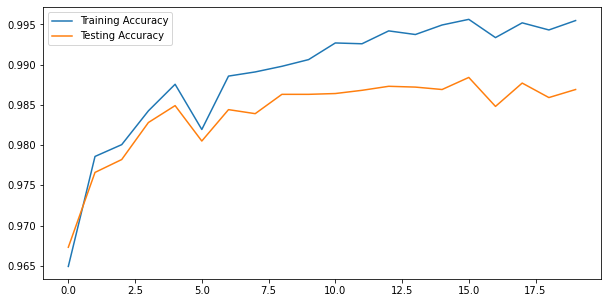

In [15]:
plt.figure(figsize=(10,5));
sns.lineplot(x = range(num_epochs), y = train_accs, label='Training Accuracy');
sns.lineplot(x = range(num_epochs), y = test_accs, label='Testing Accuracy');